In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Y00_Y08_5features = np.load('/disk1/pore_data/NanoporeTERs/Y00_Y08_5features_4149examples.npy','r')
#np.save('/disk1/pore_data/NanoporeTERs/Y00_Y08_raw20000_4149examples.npy',stacked_Y00_Y08_raw)
Y00_Y08_classes = np.load('/disk1/pore_data/NanoporeTERs/Y00_Y08_classes_4149examples.npy','r')

In [3]:
Homopol_12aa_5features = np.load('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_5features_1569examples.npy','r')
#np.save('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_raw20000_1569examples.npy',stacked_12aa_raw)
Homopol_12aa_classes = np.load('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_classes_1569examples.npy','r')



In [5]:
Y0to8_Homopol_12aa_5features = np.vstack((Y00_Y08_5features, Homopol_12aa_5features))
Y0to8_Homopol_12aa_classes = np.vstack((Y00_Y08_classes, Homopol_12aa_classes))

print np.shape(Y0to8_Homopol_12aa_5features)
print np.shape(Y0to8_Homopol_12aa_classes)
np.save('/disk1/pore_data/NanoporeTERs/Y0to8_Homopol_12aa_5features_1569examples.npy',
        Y0to8_Homopol_12aa_5features)
np.save('/disk1/pore_data/NanoporeTERs/Y0to8_Homopol_12aa_classes_1569examples.npy',
        Y0to8_Homopol_12aa_classes)

(56169, 5)
(56169, 1)


In [6]:
X_data = Y00_Y08_5features
y_data = Y00_Y08_classes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)




from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)

random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix

import pandas as pd

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08']
)

/homes/gws/kdorosch/software/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.9108826049700086


,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08
Y00,1044,17,6,3,7,1,0,8,21
Y01,23,927,23,6,4,0,0,9,7
Y02,16,26,941,22,18,6,5,0,5
Y03,4,2,28,942,29,5,0,0,1
Y04,17,7,20,37,878,36,18,8,9
Y05,13,2,16,7,50,909,12,7,4
Y06,6,5,6,9,9,22,933,8,12
Y07,20,4,6,2,7,9,9,973,20
Y08,37,5,13,12,12,6,7,21,957


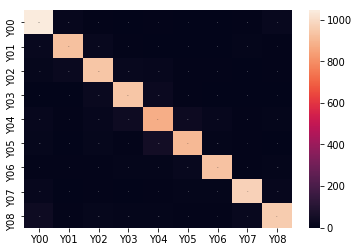

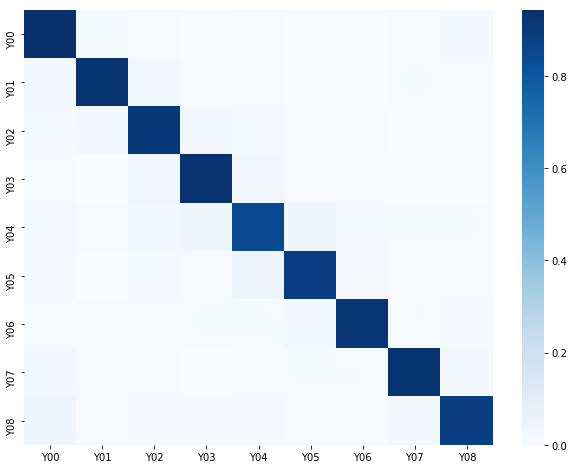

Feature ranking:
1. feature 4 (0.297706)
2. feature 0 (0.256598)
3. feature 1 (0.234212)
4. feature 3 (0.157609)
5. feature 2 (0.053875)


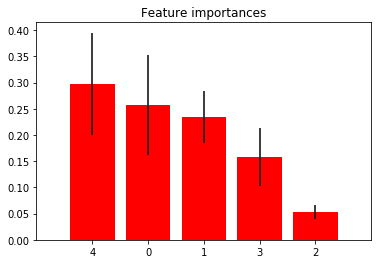

In [7]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08']
)

sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()

plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')

plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Y0toY8_12aa.svg')
plt.show()


importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [8]:
X_data = Homopol_12aa_5features
y_data = Homopol_12aa_classes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)




from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)

random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix

import pandas as pd

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['A','D','E','G','H','M','N','P','Q','R','S','T']
)

/homes/gws/kdorosch/software/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.7758657318886765


,A,D,E,G,H,M,N,P,Q,R,S,T
A,252,3,1,1,9,105,4,6,6,6,0,5
D,4,355,14,7,6,3,0,1,2,15,1,1
E,3,16,366,6,4,2,12,11,1,2,3,8
G,2,1,2,322,6,2,1,0,1,53,5,3
H,6,2,6,13,334,17,3,3,3,17,1,13
M,131,5,5,0,16,190,4,7,12,8,1,8
N,3,1,6,3,6,2,289,28,33,0,8,4
P,6,3,8,1,4,14,30,270,17,4,1,12
Q,3,3,1,1,2,3,35,8,295,4,3,7
R,2,4,1,21,2,2,3,3,0,345,0,2


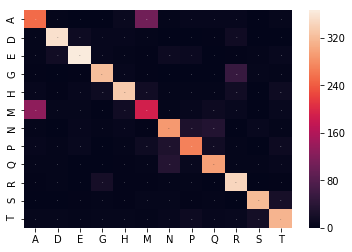

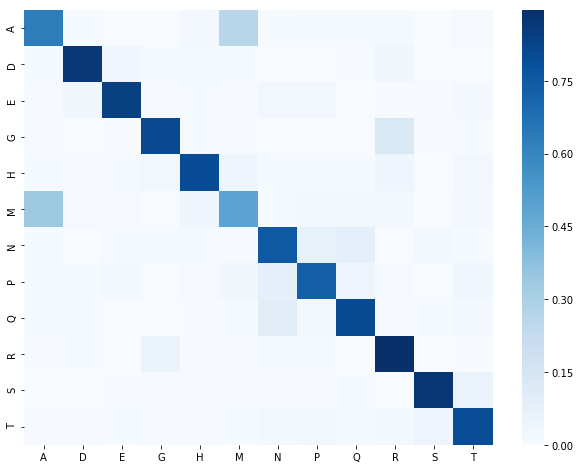

Feature ranking:
1. feature 4 (0.229157)
2. feature 3 (0.216630)
3. feature 1 (0.210834)
4. feature 0 (0.204758)
5. feature 2 (0.138622)


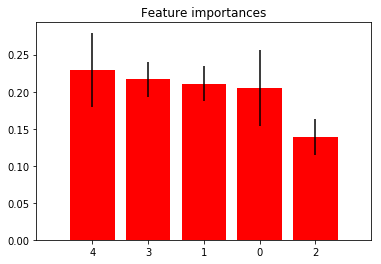

In [9]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['A','D','E','G','H','M','N','P','Q','R','S','T']
)

sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()


plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')

plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Homopol_12aa.svg')

plt.show()


importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [10]:
X_data = Y0to8_Homopol_12aa_5features
y_data = Y0to8_Homopol_12aa_classes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)




from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)

random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix

import pandas as pd

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T']
)

/homes/gws/kdorosch/software/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.8083742790002136


,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,A,...,E,G,H,M,N,P,Q,R,S,T
Y00,888,9,1,0,1,2,0,5,16,0,...,4,20,2,4,0,1,2,21,8,8
Y01,15,979,15,0,1,2,2,1,3,3,...,2,4,6,3,1,3,3,2,3,5
Y02,5,26,908,15,1,6,3,0,1,6,...,3,5,30,33,4,0,7,7,1,3
Y03,0,2,29,937,23,4,1,0,0,13,...,2,1,7,8,2,0,4,4,1,1
Y04,15,4,8,40,827,28,8,7,7,4,...,7,3,12,5,6,5,26,12,2,2
Y05,10,1,7,4,32,910,6,3,4,4,...,1,2,2,5,20,4,33,4,1,1
Y06,1,1,2,4,6,35,901,5,2,2,...,3,2,5,1,16,12,11,0,1,0
Y07,16,3,3,4,6,6,8,960,14,0,...,3,2,1,2,4,8,1,4,3,9
Y08,37,3,2,3,3,6,2,13,833,2,...,7,4,14,2,5,1,2,6,53,6
A,0,2,20,20,3,3,1,0,1,196,...,0,0,8,110,4,1,3,5,0,3


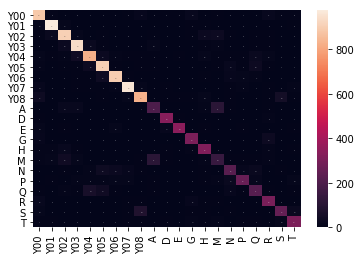

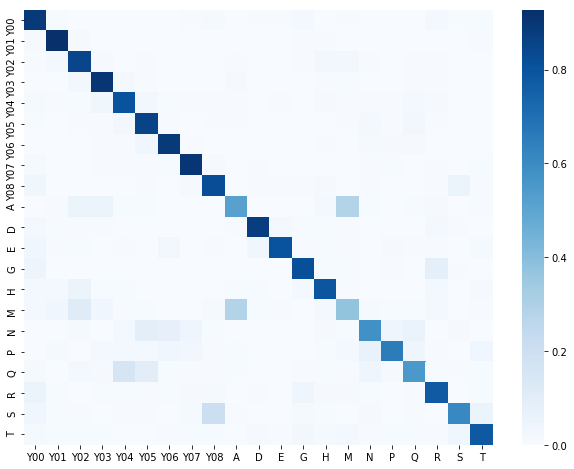

Feature ranking:
1. feature 4 (0.247524)
2. feature 1 (0.226782)
3. feature 3 (0.210056)
4. feature 0 (0.210040)
5. feature 2 (0.105598)


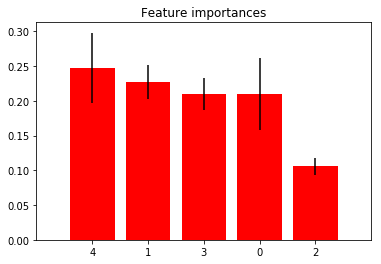

In [11]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T']
    #index=['p1']
)
#a = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a)
sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()

plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')

plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Y0toY8_Homopol_12aa.svg')

plt.show()






importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

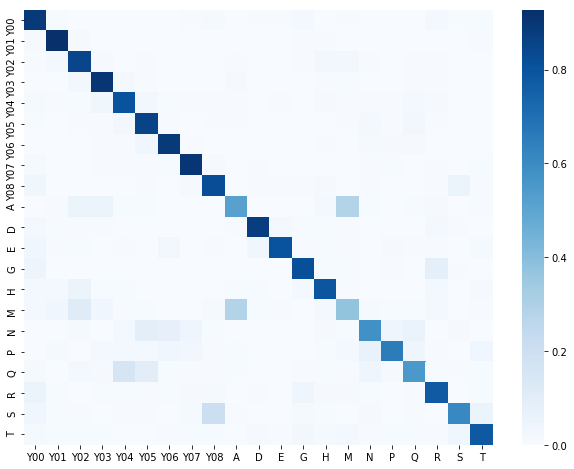

In [12]:
plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')
plt.show()

In [63]:
np.save('/disk1/pore_data/NanoporeTERs/Figures/tsne_Y0to8_Homopol_12aa_no_min.npy', X_tsne)
np.save('/disk1/pore_data/NanoporeTERs/Figures/tsne_Y0to8_Homopol_12aa_no_min_classes.npy', Y0to8_Homopol_12aa_classes_f)
